# Car Damage Severity

## Dataset

### Unzip File

In [1]:
import zipfile # to open zip file that contains dataset

In [2]:
# Path to the ZIP file
zip_path = '/content/drive/MyDrive/CarDamageSeverity/archive.zip'

# Open and extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all contents to the specified directory (e.g., '/content/')
    zip_ref.extractall('/content/')

print("ZIP file extracted successfully.")

ZIP file extracted successfully.


### Loading Data

In [3]:
import os
from PIL import Image
import numpy as np
import pandas as pd

In [4]:
# Path to the training and validation directories
train_dir = '/content/data3a/training'
val_dir = '/content/data3a/validation'

# Initialize lists to hold image data and labels for training and validation
train_data = []
val_data = []

# Load images from the training directory
for label in os.listdir(train_dir):
    label_folder = os.path.join(train_dir, label)
    if os.path.isdir(label_folder):  # Check if it's a directory
        for filename in os.listdir(label_folder):
            if filename.lower().endswith(('.jpeg', '.jpg')):  # Check for image file types
                img_path = os.path.join(label_folder, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  # Open and convert to RGB
                    img_array = np.array(img)  # Convert image to array
                    train_data.append((img_array, label))  # Add to training data list
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

# Create a DataFrame from the loaded training data
train_df = pd.DataFrame(train_data, columns=['image', 'label'])
print(f"Training data loaded into train_df with {len(train_df)} entries.")

# Load images from the validation directory
for label in os.listdir(val_dir):
    label_folder = os.path.join(val_dir, label)
    if os.path.isdir(label_folder):  # Check if it's a directory
        for filename in os.listdir(label_folder):
            if filename.lower().endswith(('.jpeg', '.jpg')):  # Check for image file types
                img_path = os.path.join(label_folder, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  # Open and convert to RGB
                    img_array = np.array(img)  # Convert image to array
                    val_data.append((img_array, label))  # Add to validation data list
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

# Create a DataFrame from the loaded validation data
test_df = pd.DataFrame(val_data, columns=['image', 'label'])
print(f"Validation data loaded into test_df with {len(test_df)} entries.")


Training data loaded into train_df with 1383 entries.
Validation data loaded into test_df with 248 entries.


## Data Exploration and Preprocessing

In [30]:
import matplotlib.pyplot as plt

### Checking Dataset Balance

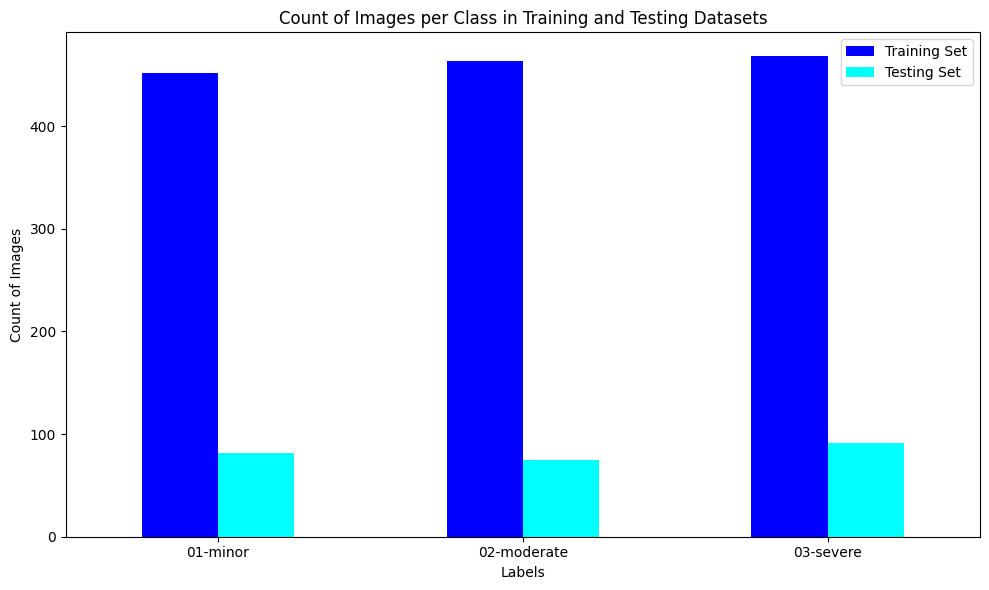

In [6]:
# Count occurrences of each label in training and testing datasets
train_counts = train_df['label'].value_counts()
test_counts = test_df['label'].value_counts()

combined_counts = pd.DataFrame({
    'train': train_counts,
    'test': test_counts
}).fillna(0)  # Fill NaN with 0 for labels not present in one of the sets

# Plotting
combined_counts.plot(kind='bar', color=['blue', 'cyan'], figsize=(10, 6))
plt.title('Count of Images per Class in Training and Testing Datasets')
plt.xlabel('Labels')
plt.ylabel('Count of Images')
plt.xticks(rotation=0)
plt.legend(['Training Set', 'Testing Set'])
plt.tight_layout()
plt.show()

### Checking Image Distribution

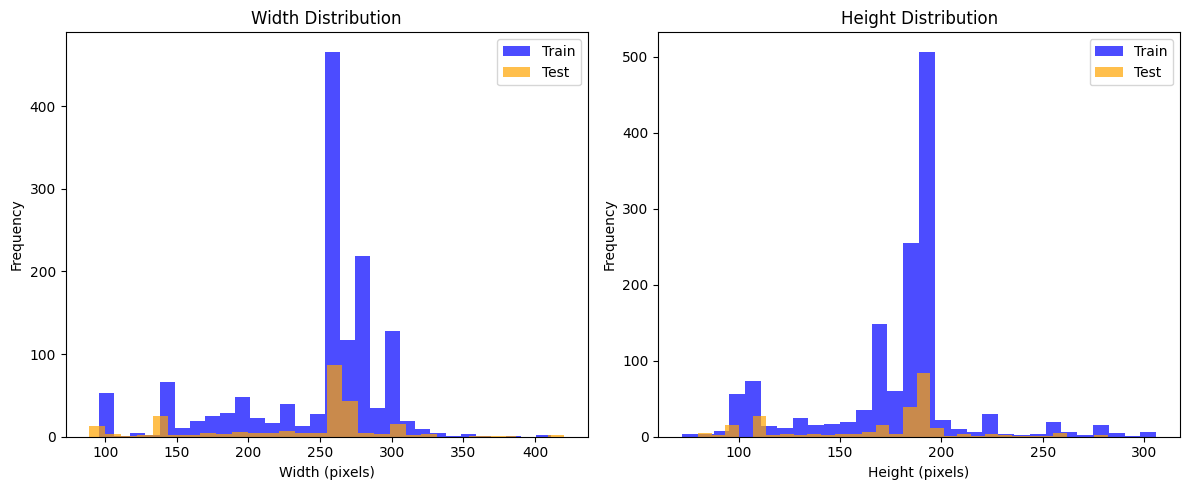

In [ ]:
# Function to get image dimensions
def get_image_dimensions(dataframe, image_col='image'):
    dimensions = []
    for img in dataframe[image_col]:
        img_array = img  # Assuming img is already in array form
        if isinstance(img_array, np.ndarray):  # Check if it’s an array
            height, width, _ = img_array.shape  # Get height and width
            dimensions.append((width, height))
    return dimensions

# Assuming you have your train_df and test_df already defined
# Extract dimensions
train_dimensions = get_image_dimensions(train_df)
test_dimensions = get_image_dimensions(test_df)

# Create DataFrames for dimensions
train_dims_df = pd.DataFrame(train_dimensions, columns=['Width', 'Height'])
test_dims_df = pd.DataFrame(test_dimensions, columns=['Width', 'Height'])

# Plotting
plt.figure(figsize=(12, 5))

# Histogram for Width
plt.subplot(1, 2, 1)
plt.hist(train_dims_df['Width'], bins=30, alpha=0.7, label='Train', color='blue')
plt.hist(test_dims_df['Width'], bins=30, alpha=0.7, label='Test', color='orange')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Height
plt.subplot(1, 2, 2)
plt.hist(train_dims_df['Height'], bins=30, alpha=0.7, label='Train', color='blue')
plt.hist(test_dims_df['Height'], bins=30, alpha=0.7, label='Test', color='orange')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Resizing Methods

### Resize with Padding

In [ ]:
# Function to resize images with aspect ratio preservation using padding
def resize_with_padding(dataframe, target_size, image_col='image'):
    padded_images = []  # List to hold padded images
    for img in dataframe[image_col]:
        img_pil = Image.fromarray(img)  # Convert NumPy array back to PIL image

        # Resize image while maintaining aspect ratio
        img_pil.thumbnail(target_size, Image.LANCZOS)

        # Create a new blank image with the target size (black background)
        new_image = Image.new("RGB", target_size)

        # Calculate the position to paste the resized image
        paste_x = (target_size[0] - img_pil.width) // 2
        paste_y = (target_size[1] - img_pil.height) // 2

        # Paste the resized image onto the new image
        new_image.paste(img_pil, (paste_x, paste_y))

        padded_images.append(np.array(new_image))  # Convert to array and store

    return padded_images

# Resize images in train_df with padding to the maximum dimensions
resizeimage_train = resize_with_padding(train_df, target_size=(224, 224))
resizeimage_test = resize_with_padding(test_df, target_size=(224, 224))

# create a new DataFrame to hold padded images
train_df = pd.DataFrame({'image': resizeimage_train, 'label': train_df['label']})
test_df = pd.DataFrame({'image': resizeimage_test, 'label': test_df['label']})

# Display the shape of the padded images
print(f"Train dataset padded images shape: {len(resizeimage_train)} images of size {resizeimage_train[0].shape if resizeimage_train else 'N/A'}")
print(f"Test dataset padded images shape: {len(resizeimage_test)} images of size {resizeimage_test[0].shape if resizeimage_test else 'N/A'}")

Train dataset padded images shape: 1383 images of size (224, 224, 3)
Test dataset padded images shape: 248 images of size (224, 224, 3)


### Resize with stretching and shrinking

In [5]:
def resize_image(image_array, target_size=(224, 224)):
  img = Image.fromarray(image_array)
  img = img.resize(target_size)
  return np.array(img)


# Apply the resize function to your DataFrame's 'image' column
train_df['image'] = train_df['image'].apply(lambda x: resize_image(x))
test_df['image'] = test_df['image'].apply(lambda x: resize_image(x))

### Visualizing Images after Resizing

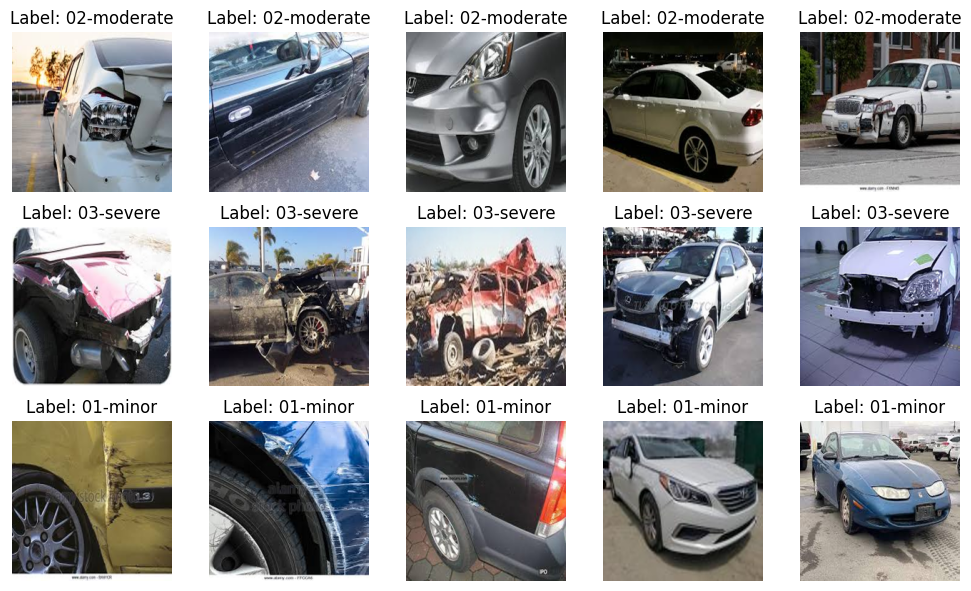

In [8]:
# Function to display 3x3 images for each label
def show_label_examples(dataframe):
    # Get unique labels from the DataFrame
    unique_labels = dataframe['label'].unique()

    # Set up the figure
    num_labels = len(unique_labels)
    fig, axes = plt.subplots(num_labels, 5, figsize=(10,6))  # 5 columns for each label

    for i, label in enumerate(unique_labels):
        # Filter images for the current label
        label_images = dataframe[dataframe['label'] == label]

        # Select 3 random examples from this label's images
        examples = label_images.sample(n=min(5, len(label_images)))  # Ensure we don't exceed available images

        for j in range(len(examples)):
            example_image, _ = examples.iloc[j]  # Get the image (label is not needed here)

            # Plotting the image
            axes[i, j].imshow(example_image)  # Display the image
            axes[i, j].set_title(f"Label: {label}")  # Show the label
            axes[i, j].axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Display examples from train_df
show_label_examples(train_df)

## Data Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from transformers import ViTFeatureExtractor, ViTModel
import torch
from tqdm import tqdm

### Label Encoding

In [7]:
label_mapping = {
    '01-minor': 0,
    '02-moderate': 1,
    '03-severe': 2
}

retrain_df = train_df
retest_df = test_df

retrain_df['label'] = train_df['label'].map(label_mapping)
retest_df['label'] = test_df['label'].map(label_mapping)

### Create Train, Val, Test Sets

In [8]:
from sklearn.model_selection import train_test_split

# Split the encoded_train_df into training and validation sets (80/20 split)
train_df, val_df = train_test_split(
    retrain_df,
    test_size=0.2,
    random_state=42,
    stratify=train_df['label']  # Ensure stratified sampling based on labels
)

### Create 2 categories (Minor & Severe)

In [15]:
train_df_filtered = train_df[train_df['label'].isin([0, 2])]
val_df_filtered = val_df[val_df['label'].isin([0, 2])]
test_df_filtered = test_df[test_df['label'].isin([0, 2])]

train_df_filtered['label'] = train_df_filtered['label'].map({0: 0, 2: 1})
val_df_filtered['label'] = val_df_filtered['label'].map({0: 0, 2: 1})
test_df_filtered['label'] = test_df_filtered['label'].map({0: 0, 2: 1})

print(train_df_filtered['label'].value_counts())
print(val_df_filtered['label'].value_counts())
print(test_df_filtered['label'].value_counts())

label
1    374
0    362
Name: count, dtype: int64
label
1    94
0    90
Name: count, dtype: int64
label
1    91
0    82
Name: count, dtype: int64


<ipython-input-15-c06264bc4788>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_filtered['label'] = train_df_filtered['label'].map({0: 0, 2: 1})
<ipython-input-15-c06264bc4788>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df_filtered['label'] = val_df_filtered['label'].map({0: 0, 2: 1})
<ipython-input-15-c06264bc4788>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

## Data Augmentation and Feature Extractor

In [40]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')
vit_model.to(device)
vit_model.eval()

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUAct

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [11]:
# Function to extract features
def extract_features(image):
    inputs = feature_extractor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    features = outputs.last_hidden_state
    return features

# Augment and extract features for each image
def augment_and_extract_features(image, num_augments):
    # Convert image to array for augmentation
    image_array = np.array(image)

    # Create an empty list to store augmented images
    augmented_images = []

    # Generate augmented images
    for _ in range(num_augments):
        augmented_image = datagen.random_transform(image_array)
        augmented_images.append(augmented_image)

    # Extract features from the augmented images
    features_list = []
    for augmented_image in augmented_images:
        features = extract_features(augmented_image)
        features_list.append(features.squeeze().cpu().numpy())  # Move to CPU and convert to numpy array

    return features_list

#### Using Data Augmentation and Feature Extractor

In [12]:
# Augment and extract features for the training set
num_augments = 10
augmented_train_features = []
augmented_train_labels = []  # Store corresponding labels for augmented images
for i, image in tqdm(enumerate(train_df['image'])):
    features = augment_and_extract_features(image, num_augments)
    augmented_train_features.extend(features)  # Add augmented features
    augmented_train_labels.extend([train_df['label'].iloc[i]] * num_augments)  # Repeat the label for each augmented version

# 6. Add the augmented features to the DataFrame
augmented_train_df = pd.DataFrame({'features': augmented_train_features, 'label': augmented_train_labels})

# Print the length of the augmented data
print(f"Augmented training dataset size: {len(augmented_train_df)}")

1106it [04:54,  3.75it/s]

Augmented training dataset size: 11060


In [13]:
# Extract features from validation images
val_features_list = []
for image in tqdm(val_df['image']):
    features = extract_features(image)
    val_features_list.append(features.squeeze().cpu().numpy())  # Convert to NumPy array if needed

# Add the extracted features to the DataFrames
val_df['features'] = val_features_list

100%|██████████| 277/277 [00:04<00:00, 61.85it/s]


In [14]:
# Extract features from validation images
test_features_list = []
for image in tqdm(test_df['image']):
    features = extract_features(image)
    test_features_list.append(features.squeeze().cpu().numpy())  # Convert to NumPy array if needed

# Add the extracted features to the DataFrames
test_df['features'] = test_features_list

100%|██████████| 248/248 [00:04<00:00, 60.80it/s]


In [15]:
def aggregate_features(features):
    aggregated_features = features[0]
    return aggregated_features

## Modeling

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import AdamW, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import MultiHeadAttention, Input, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, LayerNormalization, Add
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import ResNet50
import tensorflow as tf



### Multi-Layer Perceptron (MLP)

#### Assigning features

In [19]:
features = np.array([aggregate_features(feature) for feature in augmented_train_df['features']])

train_labels = np.array(augmented_train_df['label'])

X_train, X_test, y_train, y_test = train_test_split(features, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

In [20]:
X_val = np.array([aggregate_features(feature) for feature in val_df['features']])
y_val = np.array(val_df['label'])

In [21]:
X_test = np.array([aggregate_features(feature) for feature in test_df['features']])
y_test = np.array(test_df['label'])

#### Normalizing and Zero-Centering Values

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [24]:
import wandb
import math

wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [25]:
inputs = Input(shape=(X_train_normalized.shape[1],))
x = Dense(512, activation='relu')(inputs)
x = LayerNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = LayerNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = LayerNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = LayerNormalization()(x)
x = Dropout(0.2)(x)
outputs = Dense(3, activation='softmax')(x)

cosine_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.01,
    decay_steps=500,
    alpha=0.0
)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = cosine_decay, weight_decay=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [26]:
total_runs = 1
for run in range(total_runs):
    wandb.init(
        project="MLP Car Damage Classification",
        name=f"run_{run}",
        config={
            "learning_rate": '0.0001',
            "architecture": "MLP",
            "dataset": "CarDamageSeverity",
            "epochs": 5,
        }
    )

    for epoch in range(10):
      history = model.fit(
          X_train_normalized,
          y_train,
          validation_data=(X_val_normalized, y_val),
          epochs=1,
          batch_size=512,
          verbose=1,
      )
      wandb.log({
          "epoch": epoch,
          "accuracy": history.history["accuracy"][-1],
          "val_accuracy": history.history["val_accuracy"][-1],
          "loss": history.history["loss"][-1],
          "val_loss": history.history["val_loss"][-1],
      })


    wandb.finish()  # Mark the run as complete


wandb: Currently logged in as: ashraf_alashwal (ashraf_alashwal-uri). Use `wandb login --relogin` to force relogin


18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 593ms/step - accuracy: 0.5511 - loss: 1.0856 - val_accuracy: 0.6101 - val_loss: 0.7968
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7452 - loss: 0.5984 - val_accuracy: 0.6137 - val_loss: 0.8159
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8191 - loss: 0.4586 - val_accuracy: 0.6282 - val_loss: 0.9603
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8867 - loss: 0.3089 - val_accuracy: 0.6462 - val_loss: 1.0567
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9160 - loss: 0.2256 - val_accuracy: 0.6173 - val_loss: 1.2115
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9432 - loss: 0.1666 - val_accuracy: 0.6137 - val_loss: 1.3385
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9565 - loss: 0.1262 - val_accuracy: 0.6462 - val_loss: 1.4295
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9672 - loss: 0.0998 - val_accuracy: 0.6534 - val_loss: 1.4773
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9631 - loss: 0.1

accuracy,▁▄▅▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▁▃▄▂▁▄▅█▄
val_loss,▁▁▂▃▄▅▆▆▅█
accuracy,0.9809
epoch,9
loss,0.05756
val_accuracy,0.6426
val_loss,1.71328


In [27]:
test_loss, test_acc = model.evaluate(X_test_normalized, y_test, batch_size = X_test_normalized.shape[0])
print(f'Testing Accuracy: {test_acc:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7379 - loss: 1.2847
Testing Accuracy: 0.74


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


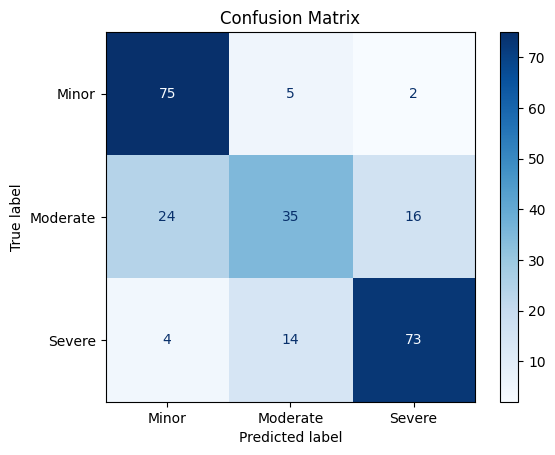

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_normalized, batch_size=X_test_normalized.shape[0])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Minor", "Moderate", "Severe"])  # Replace with your class names
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [32]:
model.save('models/MLP_model.h5')

### CNN

#### Model

In [13]:
model = Sequential([
    # First convolutional block
    Conv2D(64, (7, 7), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(128, (7, 7), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Third convolutional block
    Conv2D(128, (5, 5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fourth convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fifth convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Global Average Pooling to reduce dimensions
    GlobalAveragePooling2D(),

    # Dense layers with increased units
    Dense(512, activation='relu'),

    Dense(256, activation='relu'),

    Dense(128, activation='relu'),

    # Output layer
    Dense(3, activation='softmax')  # Adjust for number of classes
])

# Optimizer and learning rate adjustment
model.compile(optimizer=AdamW(learning_rate = 0.0001, weight_decay=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Splitting the data

In [22]:
# Splitting train_df to use for training CNN model
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    train_df['image'],
    train_df['label'],
    test_size=0.2,
    random_state=42
)

X_train1 = np.array([image for image in X_train1])
X_val1 = np.array([image for image in X_val1])

In [16]:
# Splitting train_df to use for training CNN model
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    train_df_filtered['image'],
    train_df_filtered['label'],
    test_size=0.2,
    random_state=42
)

X_train1 = np.array([image for image in X_train1])
X_val1 = np.array([image for image in X_val1])

##### Normalizing Values

In [23]:
X_train1 = X_train1 / 255
X_val1 = X_val1 / 255

##### Generate Images

In [24]:
# image generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create an empty list to store new augmented images
augmented_images = []
augmented_labels = []

# Number of new images to generate per original image
num_augmented_per_image = 3

for img, label in zip(X_train1, y_train1):
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match (1, height, width, channels)
    gen = datagen.flow(img, batch_size=1)  # Create generator for a single image

    for i in range(num_augmented_per_image):
        aug_img = next(gen)[0]  # Get the next augmented image
        augmented_images.append(aug_img)  # Store the image
        augmented_labels.append(label)  # Store the corresponding label

# Convert to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)
print(augmented_images.shape)  # Should be (num_images * num_augmented_per_image, height, width, channels)
print(augmented_labels.shape)

# Validation doesnt augment images
val_generator = ImageDataGenerator().flow(X_val1, y_val1, batch_size=32)

(2652, 224, 224, 3)
(2652,)


##### Train and Test

In [25]:
# Number of runs
total_runs = 1
for run in range(total_runs):
    # Initialize W&B run
    wandb.init(
        project="ResNet Car Damage Classification",
        name=f"run_{run}",
        config={
            "learning_rate": 0.0001,
            "architecture": "ResNet",
            "dataset": "CarDamageSeverity",
            "epochs": 30,
            "batch_size": 32,
        }
    )

    # Train the model for the specified number of epochs
    for epoch in range(30):
        history = model.fit(
            augmented_images,
            augmented_labels,
            validation_data=val_generator,
            epochs=1,
            batch_size=32,
            verbose=1,
        )

        # Log training and validation metrics to W&B
        wandb.log({
            "epoch": epoch,
            "accuracy": history.history["accuracy"][-1],
            "val_accuracy": history.history["val_accuracy"][-1],
            "loss": history.history["loss"][-1],
            "val_loss": history.history["val_loss"][-1],
        })

    wandb.finish()

accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁▁
val_loss,▁█
accuracy,0.81689
epoch,1
loss,0.41642
val_accuracy,0.50676
val_loss,1.24987


83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 498ms/step - accuracy: 0.4810 - loss: 1.4717 - val_accuracy: 0.3514 - val_loss: 1.7544
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.5912 - loss: 0.8672 - val_accuracy: 0.3514 - val_loss: 1.8531
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.6142 - loss: 0.8309 - val_accuracy: 0.3559 - val_loss: 1.6119
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.6197 - loss: 0.8004 - val_accuracy: 0.3964 - val_loss: 1.3622
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.6602 - loss: 0.7395 - val_accuracy: 0.5045 - val_loss: 0.9654
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.6994 - loss: 0.6982 - val_accuracy: 0.5405 - val_loss: 0.9128
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.7501 - loss: 0.5999 - val_accuracy: 0.5495 - val_loss: 1.0339
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.7816 - loss: 0.5529 - val_accuracy: 0.5450 - val_loss: 1.0806
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.

KeyboardInterrupt: 

### ResNet

In [27]:
# Load ResNet50 with pre-trained weights, exclude the top (classifier) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze ResNet layers
resnet_base.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [28]:
# Unfreeze some layers for fine-tuning
for layer in resnet_base.layers[-3:]:  # Unfreeze the last 10 layers
    layer.trainable = True


In [29]:
model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),  # Reduces the feature map to a single vector per channel
    Dense(256, activation='relu'),  # Fully connected layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])


In [31]:
model.compile(
    optimizer=AdamW(learning_rate=0.001, weight_decay=0.1),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
# Number of runs
total_runs = 1
for run in range(total_runs):
    # Initialize W&B run
    wandb.init(
        project="ResNet Car Damage Classification",
        name=f"run_{run}",
        config={
            "learning_rate": 0.0001,
            "architecture": "ResNet",
            "dataset": "CarDamageSeverity",
            "epochs": 50,
            "batch_size": 32,
        }
    )

    # Train the model for the specified number of epochs
    for epoch in range(50):
        history = model.fit(
        augmented_images, augmented_labels,
        validation_data=val_generator,
        epochs=50,
        batch_size=64,
    )

        # Log training and validation metrics to W&B
        wandb.log({
            "epoch": epoch,
            "accuracy": history.history["accuracy"][-1],
            "val_accuracy": history.history["val_accuracy"][-1],
            "loss": history.history["loss"][-1],
            "val_loss": history.history["val_loss"][-1],
        })

    wandb.finish()

accuracy,▁▂▃▃▃▄▄▅▆▆▇▇▇██████████
epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
loss,█▆▆▆▆▅▅▄▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▂▅▆▇▆█▇▆▆▅▅▆▆▆█▄▇▆▆▆
val_loss,▄▄▃▂▁▁▁▂▂▂▃▅▄▄▅▆▆▅█▆▆▅▆
accuracy,0.98265
epoch,22
loss,0.04978
val_accuracy,0.51351
val_loss,2.62457


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 588ms/step - accuracy: 0.4083 - loss: 1.1751 - val_accuracy: 0.3919 - val_loss: 1.0741
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - accuracy: 0.5101 - loss: 0.9675 - val_accuracy: 0.4324 - val_loss: 1.1597
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.5266 - loss: 0.9271 - val_accuracy: 0.4414 - val_loss: 1.0994
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.5326 - loss: 0.9342 - val_accuracy: 0.4414 - val_loss: 1.1291
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.5534 - loss: 0.9132 - val_accuracy: 0.4775 - val_loss: 1.0827
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.5930 - loss: 0.8820 - val_accuracy: 0.4550 - val_loss: 1.1802
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.5702 - loss: 0.8997 - val_accuracy: 0.3964 - val_loss: 1.1875
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.5646 - loss: 0.9104 - val_accurac

KeyboardInterrupt: 

In [ ]:
model.save('models/ResNet2ClassesModel.h5')

## Gradio

In [33]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [34]:
load_model = tf.keras.models.load_model('models/MLP_model.h5')

In [35]:
def extract_features(preprocessed_image):
    # Ensure the input is already preprocessed and on the correct device
    preprocessed_image = preprocessed_image.to(device)

    # Pass the preprocessed tensor through the model
    with torch.no_grad():
        outputs = vit_model(pixel_values=preprocessed_image)
    return outputs.last_hidden_state

In [42]:
import gradio as gr

def predict(image):
    # Step 1: Resize the image to 224x224
    image = image.resize((224, 224))

    # Step 2: Extract features from the resized image using the feature extractor
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Step 3: Extract features using the Vision Transformer model
    with torch.no_grad():
        features = extract_features(inputs["pixel_values"])

    # Step 4: Aggregate the extracted features using your aggregation function
    aggregated_features = aggregate_features(features.cpu().numpy())

    # Step 5: Standardize the aggregated features (apply the same scaler used during training)
    aggregated_features_scaled = scaler.transform(aggregated_features)

    # Step 6: Make predictions using the model
    predictions = model.predict(aggregated_features_scaled)
    class_idx = np.argmax(predictions, axis=1)[0]
    class_label = ["Minor", 'Moderate', "Severe"][class_idx]
    confidence = predictions[0][class_idx]

    return f"Prediction: {class_label}, Confidence: {confidence:.2f}"



# Create Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="Car Damage Classification",
    description="Upload an image of car damage to predict its severity level."
)

# Launch the Gradio app
interface.launch(debug = True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6ca7f4a11c85b224c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6ca7f4a11c85b224c4.gradio.live
